### Importação das bibliotecas

<b>Pandas</b> - Manipulação e Análise de Bases de Dados 

<b>Numpy</b> - Computação numérica

<b>Seaborn</b> - Plotagem de Gráficos e Visualização de Dados

<b>Matplotlib</b> - Configuração do ambiente de plotagem de gráficos

<b>Scipy</b> - Função para cálculo de métrica de relação de atributos
    
<b>OLS</b> - Modelo Ordinary Least Squares para cálculo e análise da métrica P-value

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
# Configurando o tamanho da fonte dos gráficos a serem plotados
font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

A biblioteca de geração de modelos inteligentes baseados em Aprendizado de Máquina foi a Scikit-learn, por oferecer uma ampla gama de ferramentas para treinamento, avaliação dos modelos e pré-processamento dos dados de forma facilitada.

<b>LinearRegression</b> - Regressor Linear para criação de um Baseline 

<b>sklearn.metrics</b>  - Métricas de avaliação de modelo MAE, MSE e R2

<b>KFold</b>            - Método de treinamento e avaliação dos modelos

<b>LabelEncoder</b>     - Método de Pré-processamento de variáveis categóricas

<b>sqrt</b>             - Função do cálculo da Raiz Quadrada para geração da métrica RMSE

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

from math import sqrt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
REGPLOT_X = 7
REGPLOT_Y = 1
def plot_regplots(number_index, dataframe, graph_x= REGPLOT_X, graph_y= REGPLOT_Y):

    fig, ax = plt.subplots(REGPLOT_X,REGPLOT_Y, figsize=(20,160))
    fig_x = 0
    fig_y = 0

    
    for i in range(len(number_index)):
        
        b = sns.regplot(x=df[df.loc[:, i]], 
                          data=df, 
                          color='gray', 
                          ax=ax[fig_x][fig_y])

        b.set_xlabel(i, fontsize=20)
        
        fig_x = (fig_x + 1) % REGPLOT_X
        if(fig_x == 0):
            fig_y = (fig_y + 1) % REGPLOT_Y

In [6]:
BOXPLOT_X = 9
BOXPLOT_Y = 3

def plot_boxplots(number_index, df, graph_x= BOXPLOT_X, graph_y=BOXPLOT_Y):

    fig, ax = plt.subplots(graph_x,graph_y, figsize=(20,160))
    fig_x = 0
    fig_y = 0

    
    for i in number_index:
        
        b = sns.boxplot(x=df[i], 
                          data=df, 
                          color='gray', 
                          ax=ax[fig_x][fig_y])

        b.set_xlabel(i, fontsize=20)
        
        fig_x = (fig_x + 1) % graph_x
        if(fig_x == 0):
            fig_y = (fig_y + 1) % graph_y

In [7]:
DISTPLOT_X = 9
DISTPLOT_Y = 3

def plot_distplots(number_index, df, graph_x=DISTPLOT_X, graph_y=DISTPLOT_Y):

    fig, ax = plt.subplots(graph_x,graph_y, figsize=(20,160))
    fig_x = 0
    fig_y = 0

    
    for i in number_index:
        
        b = sns.distplot(df[i], 
                          color='gray', 
                          ax=ax[fig_x][fig_y])

        b.set_xlabel(i, fontsize=20)
        
        fig_x = (fig_x + 1) % graph_x
        if(fig_x == 0):
            fig_y = (fig_y + 1) % graph_y

In [8]:
def plot_regplot(df, col):
    plt.figure(figsize=(20,10))
    b = sns.regplot(x=i,
                    y='SalePrice', 
                    data=df, 
                    color='gray')

    b.set_xlabel(i, fontsize=20)
    plt.show()

In [9]:
def train_baseline(df):
    # Criando um novo DataFrame sem os exemplos com dados faltantes para treinamento do modelo baseline
    df_train = df.dropna()  

    # Verificando os atributos categóricos para transformação
    is_category = df_train.dtypes == 'object'
    cat_index = df_train.columns[is_category]

    # Transformação das colunas categóricas
    for cat in cat_index:
        df_train.loc[:, cat] = LabelEncoder().fit_transform(df_train.loc[:, cat])

    # Separação das variáveis preditoras e variável alvo
    X = df_train.drop('SalePrice', axis=1)   
    y = df_train['SalePrice'].values

    # Treinamento do modelo baseline
    kf = KFold(n_splits=10)

    kf.get_n_splits(X)

    mae = []
    rmse = []
    r2 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)

        mae.append(mean_absolute_error(y_test, y_pred))
        rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
        r2.append(r2_score(y_test, y_pred))

    print('A média da métrica MAE foi de {}'.format(round(np.mean(mae), 2)))
    print('A média da métrica RMSE foi de {}'.format(round(np.mean(rmse), 2)))
    print('A média da métrica R2 foi de {}'.format(round(np.mean(r2), 4)))

In [10]:
df = pd.read_csv('dataset/train_cat_clean.csv', index_col='Id')

In [11]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  Exterior1st    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [14]:
# Verificando quais atributos são numéricos
is_number = df.dtypes != 'object'
number_index = df.columns[is_number]

In [15]:
number_index

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

A fim de aferir o correlação dos atributos numéricos com o atributo alvo, foi utilizada a Correlação de Pearson para verificar se há e quais são os atributos que não possuem uma correlação tão forte com o atributo alvo (SalePrice).

A Correlação de Pearson mede o grau da correlação linear entre duas variáveis de escala métrica.

In [16]:
# Calculando a Correlação de Pearson dos atributos númericos preditor com o atributo alvo
df[number_index].corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotArea,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


In [17]:
# Verificando as correlações do atributo SalePrice com os demais
salePrice_corr = df[number_index].corr()['SalePrice']
salePrice_corr

LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [18]:
# Verificando quais atributos numéricos apresentaram baixa correlação com o atributo alvo
low_corr = []
for corr, index in zip(salePrice_corr, salePrice_corr.index):
    if(corr < 0.1 and corr > -0.1):
        low_corr.append(index)

print('Os atributos numéricos que apresentaram uma baixa correlação com o atributo alvo foram:')
for number in low_corr:
    print('-> ', number)

Os atributos numéricos que apresentaram uma baixa correlação com o atributo alvo foram:
->  OverallCond
->  BsmtFinSF2
->  LowQualFinSF
->  BsmtHalfBath
->  3SsnPorch
->  PoolArea
->  MiscVal
->  MoSold
->  YrSold


Podemos ver que os atributos MoSold e YrSold separadamente não apresentam uma forte correlação com a variável alvo, no entanto se uni-los eles podem apresentar alguma tendência temporal.

In [19]:
MoYrSold = df['MoSold'].astype('str') + '/' + df['YrSold'].astype(str)
MoYrSold

Id
1        2/2008
2        5/2007
3        9/2008
4        2/2006
5       12/2008
         ...   
1456     8/2007
1457     2/2010
1458     5/2010
1459     4/2010
1460     6/2008
Length: 1460, dtype: object

In [20]:
df_copy = df.copy()

df_copy['MoYrSold'] = MoYrSold
df_copy['MoYrSold'] = pd.to_datetime(df_copy['MoYrSold'])

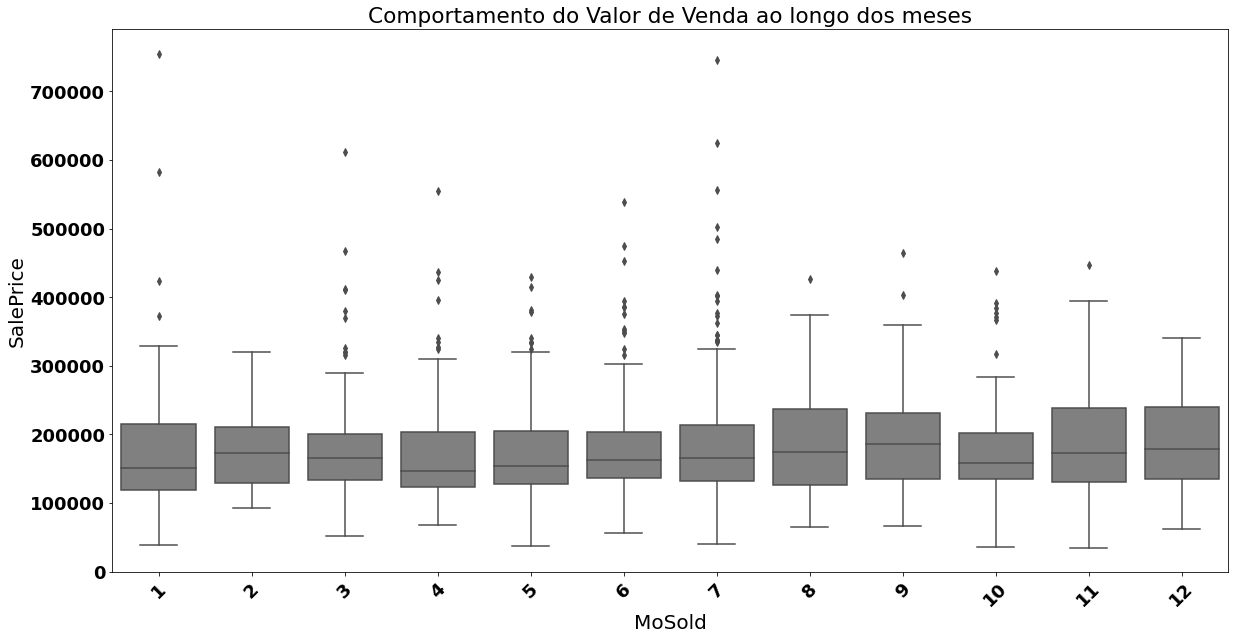

In [21]:
plt.figure(figsize=(20,10))
b = sns.boxplot(x='MoSold',y='SalePrice', data=df_copy, color='gray')
b.set_xlabel('MoSold', fontsize=20)
b.set_ylabel('SalePrice', fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
b.set_title('Comportamento do Valor de Venda ao longo dos meses')
plt.show()

Analisando somente pelo mês de venda não é possível ver uma tendência forte de crescimento no valor da venda.

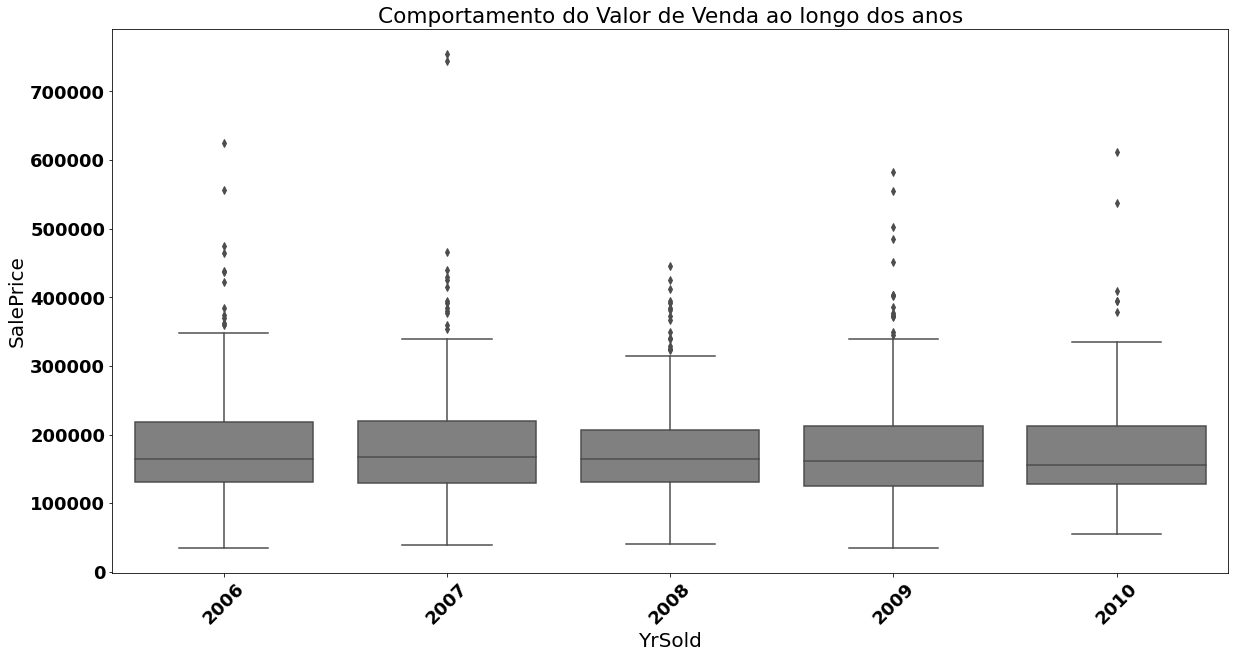

In [22]:
plt.figure(figsize=(20,10))
b = sns.boxplot(x='YrSold',y='SalePrice', data=df_copy, color='gray')
b.set_xlabel('YrSold', fontsize=20)
b.set_ylabel('SalePrice', fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
b.set_title('Comportamento do Valor de Venda ao longo dos anos')
plt.show()

Analisando somente pelo ano de venda também não é possível ver uma tendência forte de crescimento no valor da venda.

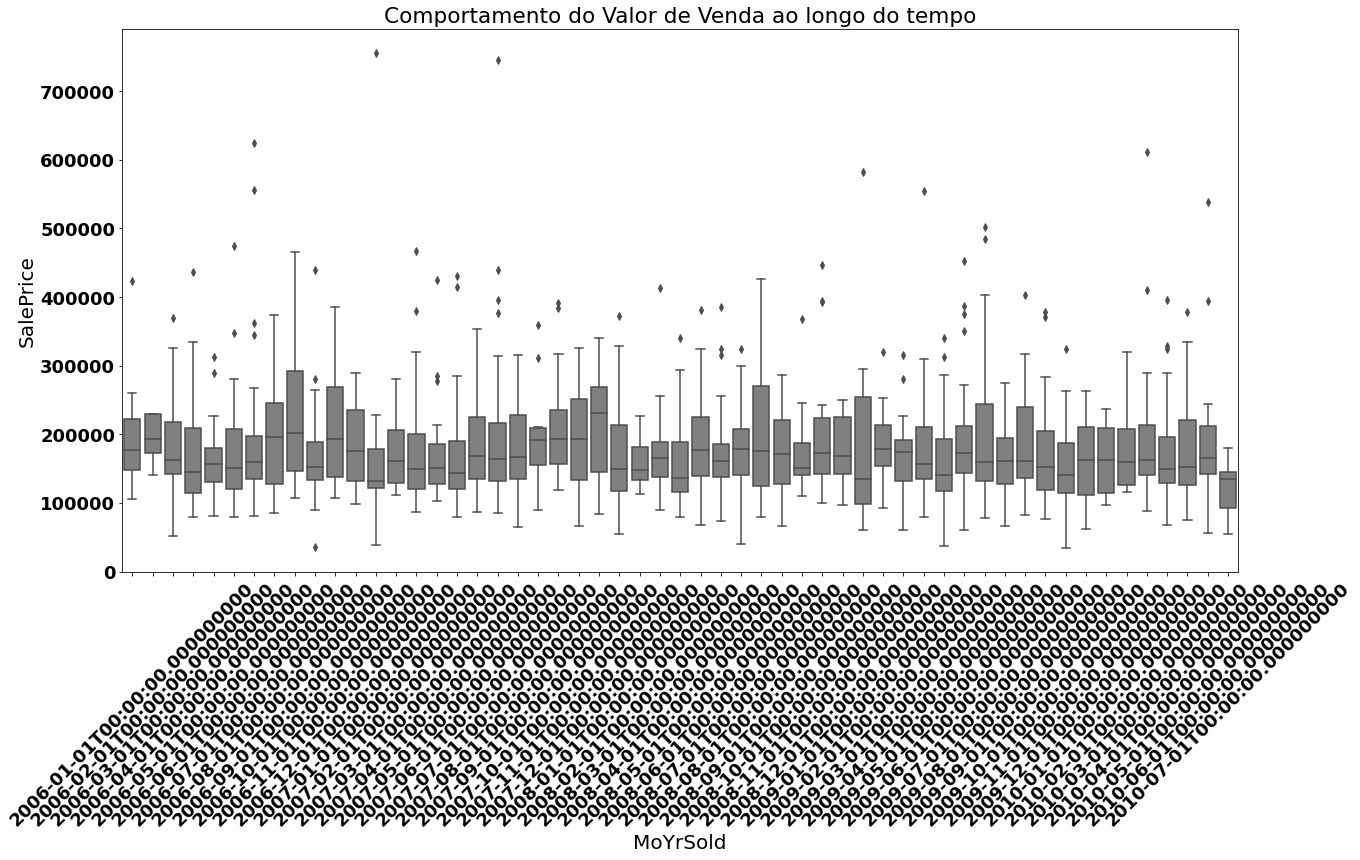

In [23]:
plt.figure(figsize=(20,10))
b = sns.boxplot(x='MoYrSold',y='SalePrice', data=df_copy, color='gray')
b.set_xlabel('MoYrSold', fontsize=20)
b.set_ylabel('SalePrice', fontsize=20)
b.set_xticklabels(b.get_xticklabels(), rotation=45)
b.set_title('Comportamento do Valor de Venda ao longo do tempo')
plt.show()

Vendo pela união do mês e do ano é possível ver certa sazonalidade no valor de venda ao longo do tempo, porém não é possível ver uma tendência de crescimento ou descrescimento no valor da venda, portanto todos os 3 atributos serão desconsiderados.

In [24]:
low_corr

['OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

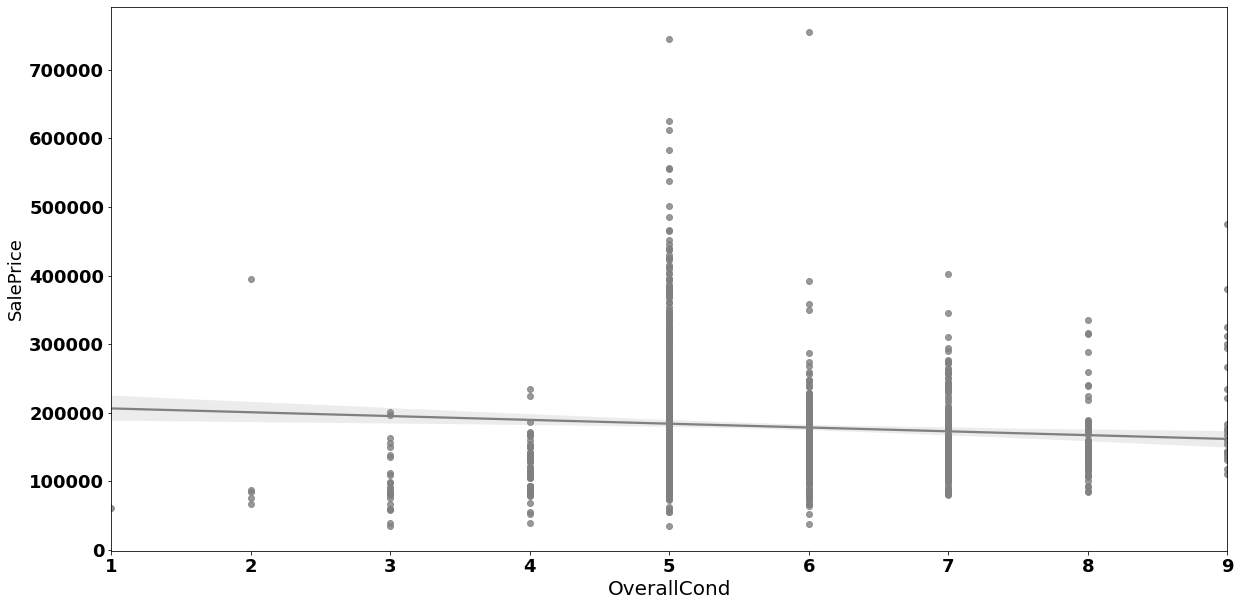

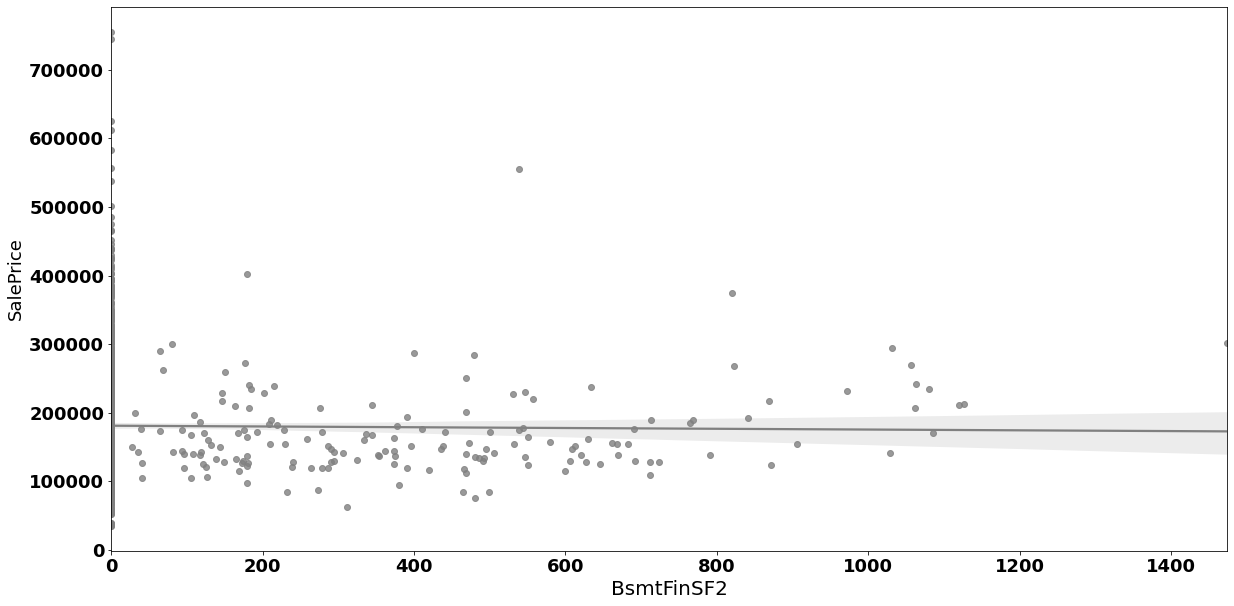

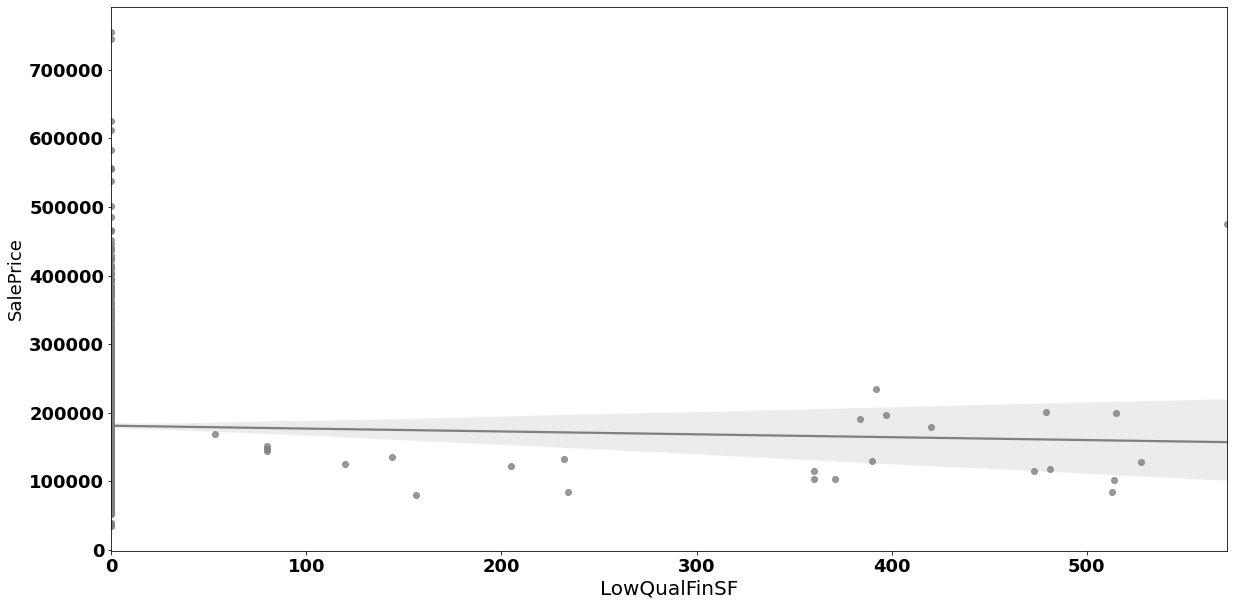

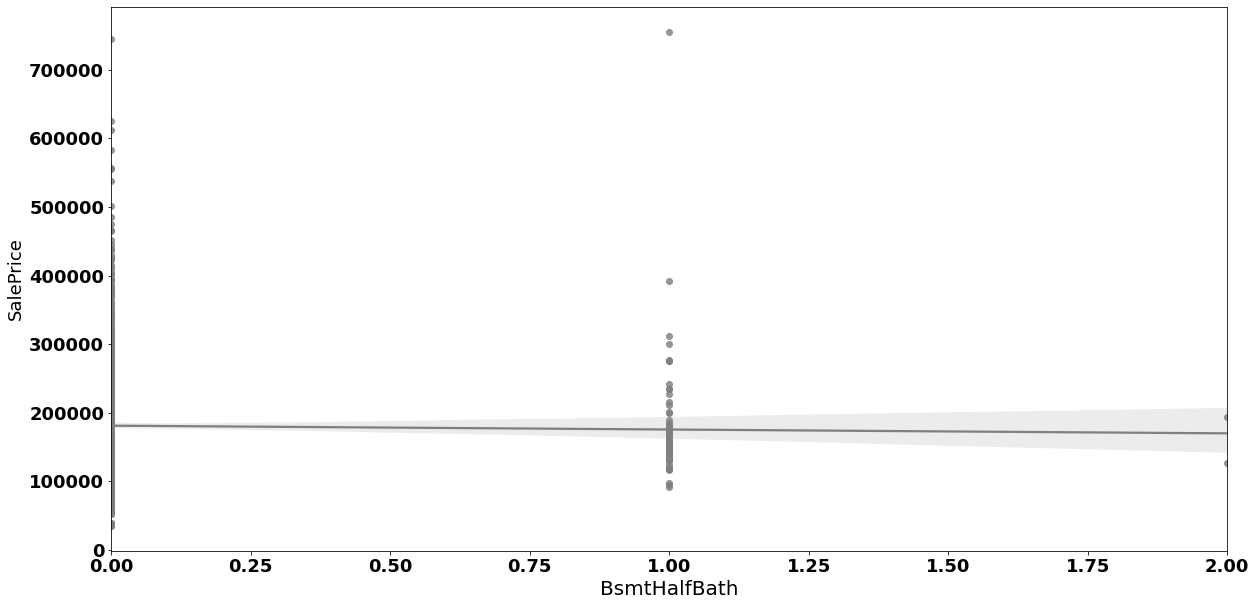

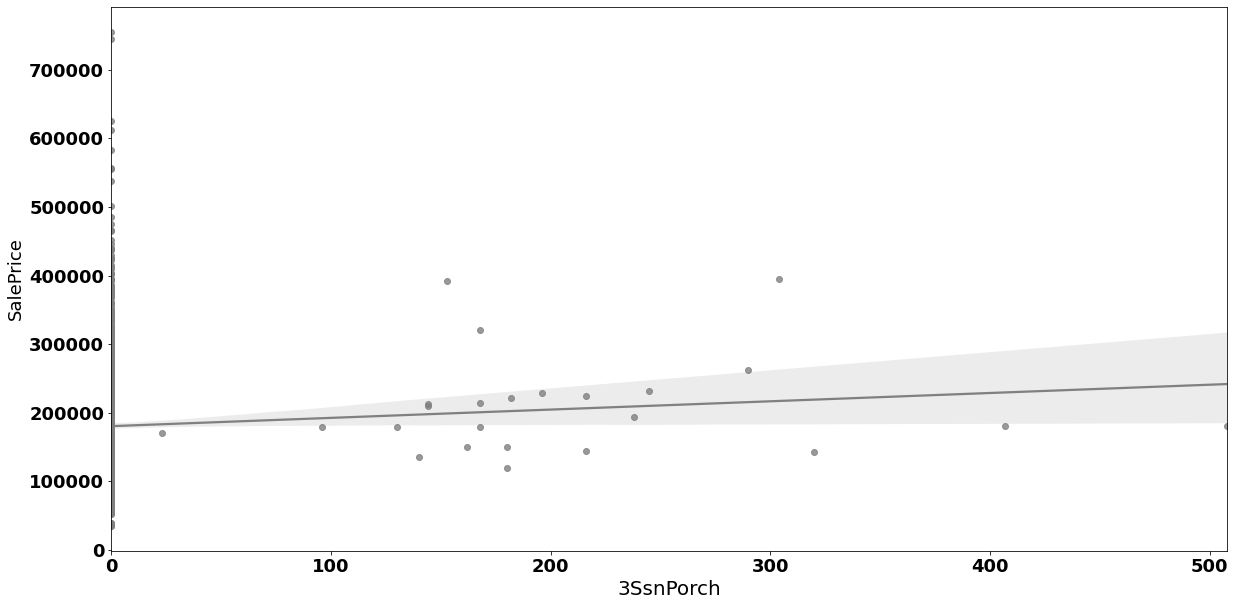

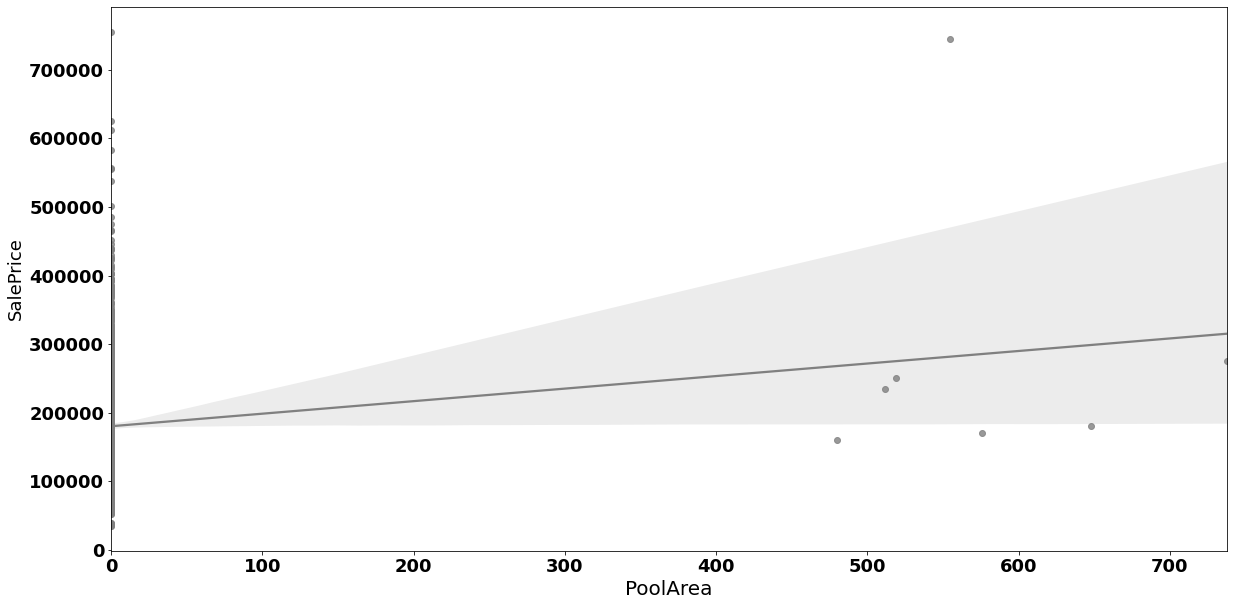

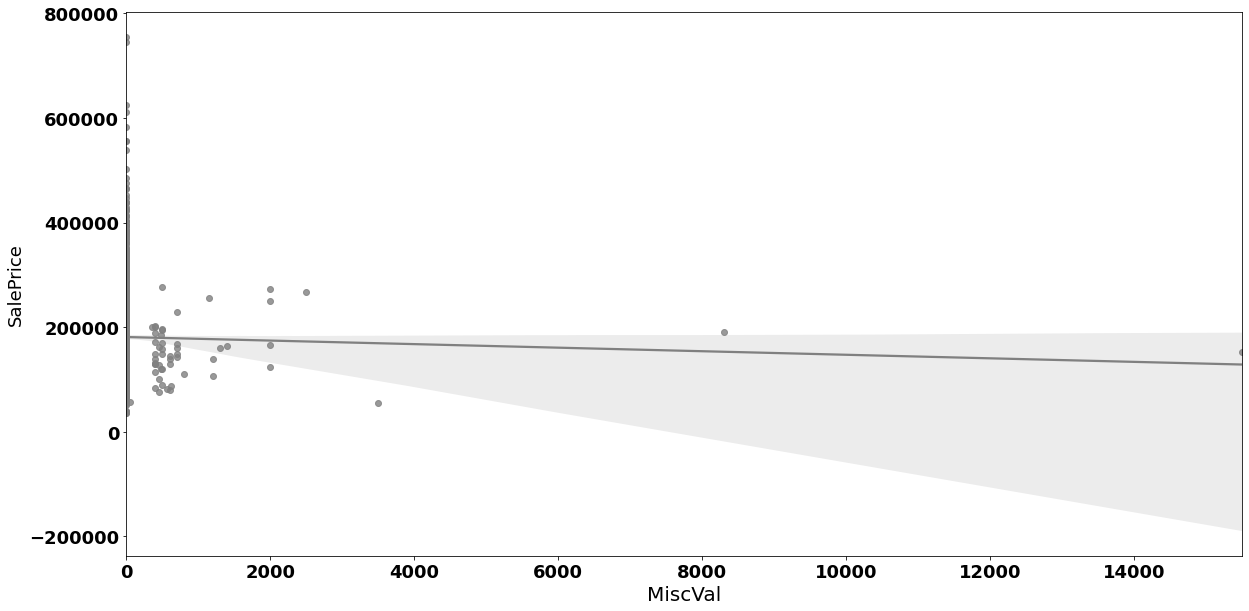

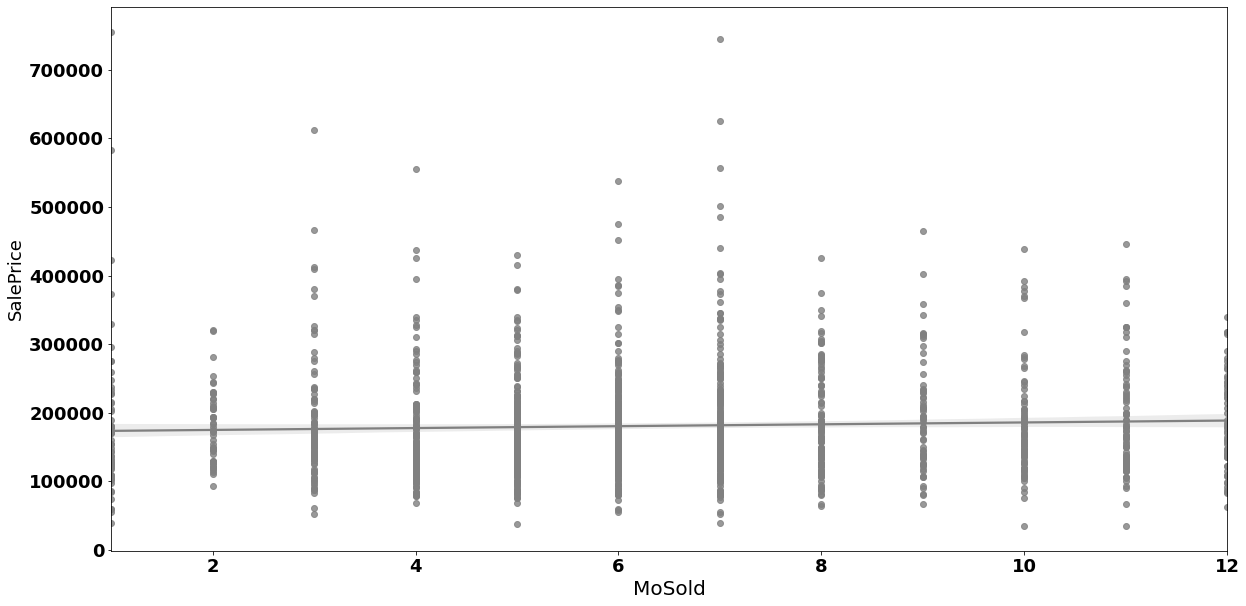

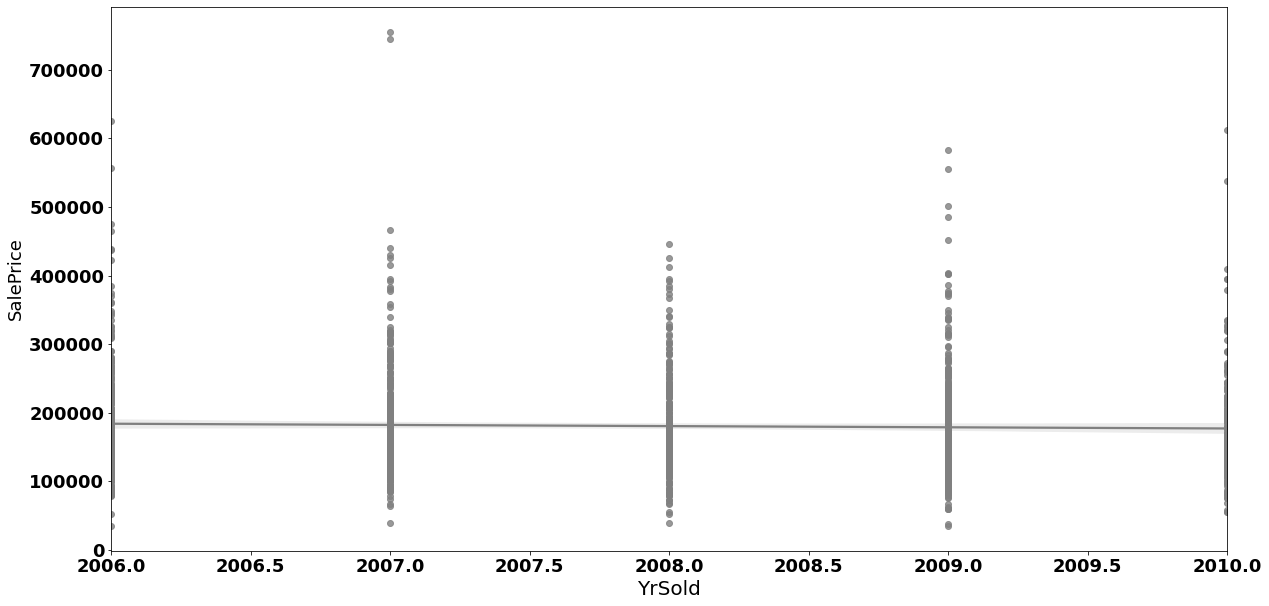

In [25]:
for i in low_corr:
    plot_regplot(df_copy, i)

Analisando os gráficos de regressão acima vemos um pouco da relação dos que apresentaram baixa correlação com o atributo alvo.

<i>OverallCond</i> indica a condição em que a casa está no momento da venda numa escala de 1 - 10, sendo que quanto mais próximo de 10 melhor, no entanto o gráfico apresenta uma queda no preço da venda com maiores valores do atributo, sendo uma correlação negativa, porém é muito sutil então pode entender como se não houvesse relação e exemplos extremos estão influenciando nessa suposta queda.

<i>BsmtFinSF2</i>, <i>LowQualFinSF</i>, <i>BsmtHalfBath</i>, <i>MiscVal</i>, <i>3SsnPorch</i>, <i>MoSold</i> e <i>YrSold</i> apresentam um linha de regressão quase reta, apresentando assim uma correlação quase nula.

O atributo <i>PoolArea</i> no entanto apresenta uma certa elevação no preço da casa quanto maior é seu valor, este atributo está sendo afetado pelo número de casas que não possuem piscina distribuidos largamente no expectro do preço de venda, portanto podemos concluir que esta variável é sim importante para determinar o valor da casa

In [26]:
low_corr.remove('PoolArea')  # Removendo o atributo PoolArea do conjunto de atributos não relacionados com o atributo alvo

In [27]:
df_copy = df_copy.drop(low_corr, axis=1)        # Retirando atributos não correlacionados com o atributo alvo
df_copy = df_copy.drop('MoYrSold', axis=1)      # Removendo o atributo criado a partir dos atributos MoSold e YrSold

In [28]:
df_copy.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,...,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,...,TA,Y,0,61,0,0,0,WD,Normal,208500
2,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,...,TA,Y,298,0,0,0,0,WD,Normal,181500
3,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,...,TA,Y,0,42,0,0,0,WD,Normal,223500
4,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,...,TA,Y,0,35,272,0,0,WD,Abnorml,140000
5,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,...,TA,Y,192,84,0,0,0,WD,Normal,250000


In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  Exterior1st    1460 non-null   object 
 13  MasVnrType     1452 non-null   object 
 14  MasVnrArea     1452 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [30]:
# Verificando quais atributos são numéricos
is_number = df_copy.dtypes != 'object'
number_index = df_copy.columns[is_number]

In [31]:
number_index

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

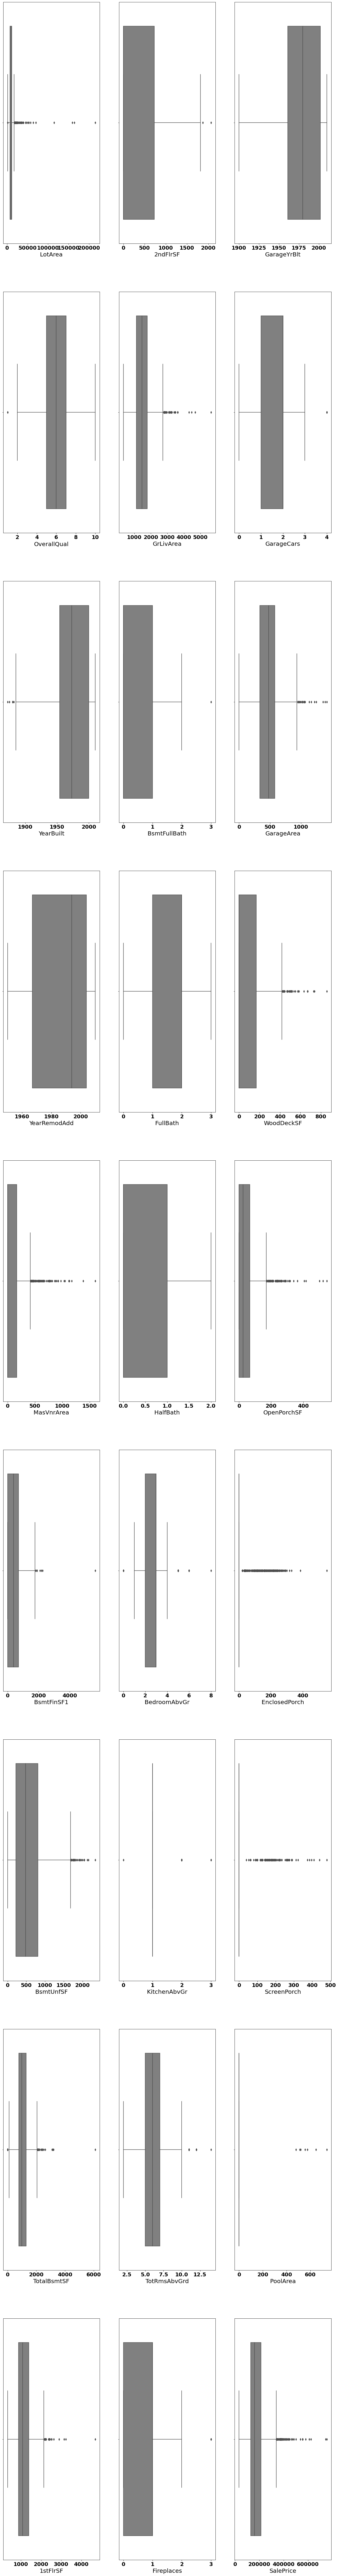

In [32]:
plot_boxplots(number_index, df_copy)

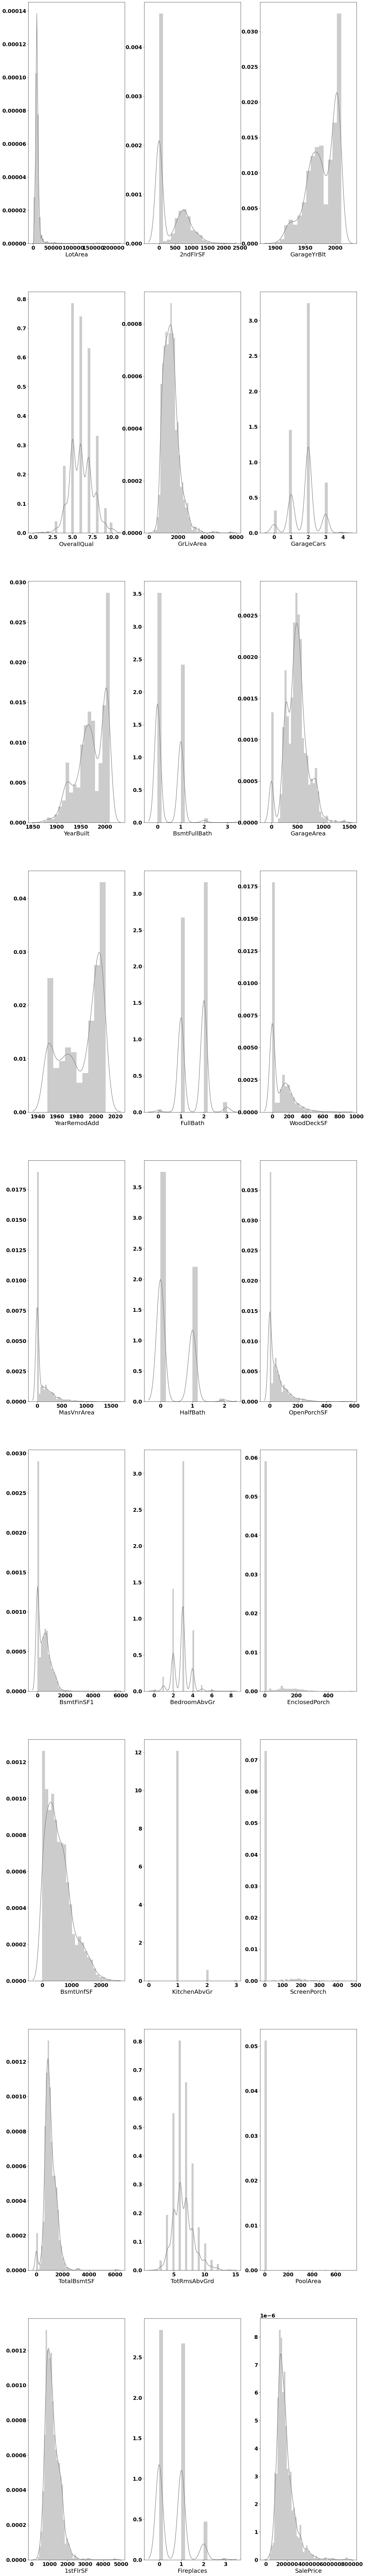

In [33]:
plot_distplots(number_index, df_copy)

A partir da análise univariada dos gráficos de distribuição e de caixa dos atributos numéricos é possível identificar alguns atributos que, mesmo tendo uma boa correlação com o atributo alvo, não possuem uma variação considerável, é possível verificar que a distribuição de alguns atributos estão altamente concentrados em um torno de um valor, como por exemplo o atributo analisado anteriormente <i>PoolArea</i>, mesmo que ele tenha mostrado importância no valor de venda da casa, não há exemplos o suficiente para que o modelo entenda. Portanto, esses atributos que apresentaram forte concentração em um valor serão retirados da base de dados, sendo eles: <i>LotArea</i>, <i>EnclosedPorch</i>, <i>KitchenAbvGr</i>, <i>ScreenPorch</i> e <i>PoolArea</i>.

In [34]:
df_copy = df_copy.drop(['LotArea','EnclosedPorch','KitchenAbvGr','ScreenPorch','PoolArea'], axis=1)

In [35]:
df_copy.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,YearBuilt,...,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,2003,...,RFn,2,548,TA,Y,0,61,WD,Normal,208500
2,20,RL,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,1976,...,RFn,2,460,TA,Y,298,0,WD,Normal,181500
3,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,2001,...,RFn,2,608,TA,Y,0,42,WD,Normal,223500
4,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,1915,...,Unf,3,642,TA,Y,0,35,WD,Abnorml,140000
5,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,2000,...,RFn,3,836,TA,Y,192,84,WD,Normal,250000


In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Exterior1st    1460 non-null   object 
 12  MasVnrType     1452 non-null   object 
 13  MasVnrArea     1452 non-null   float64
 14  ExterQual      1460 non-null   object 
 15  ExterCond      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

In [37]:
# Análise do desempenho do modelo baseline
train_baseline(df_copy)

A média da métrica MAE foi de 21333.86
A média da métrica RMSE foi de 34708.62
A média da métrica R2 foi de 0.7911


In [38]:
df_copy.corr()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,...,0.273458,0.101676,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,...,0.242656,-0.070651,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,...,0.183331,-0.040581,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.507101
MasVnrArea,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,...,0.201444,0.102821,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,0.477493
BsmtFinSF1,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,...,0.004262,-0.107355,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,...,-0.041118,0.166643,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,...,-0.048804,0.050450,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,...,-0.119916,0.127401,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,0.605852
2ndFlrSF,0.295493,0.010308,0.140024,0.174561,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,...,0.609707,0.502901,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.319334
GrLivArea,0.593007,0.199010,0.287389,0.390857,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,...,0.415772,0.521270,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.708624


Agora todas os atributos numéricos preditores apresentam forte correlação com o atributo alvo, no entanto ainda há alguns atributos que tem forte correlação com outros atributos, como é o caso de <i>GarageCars</i> e <i>GarageArea</i> e <i>YearBuilt</i> e <i>YearRemodAdd</i>.

In [39]:
df_copy[['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']].corr()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
BsmtFinSF1,1.000000,-0.495251,0.522396
BsmtUnfSF,-0.495251,1.000000,0.415360
TotalBsmtSF,0.522396,0.415360,1.000000


In [40]:
df_copy[['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF']].head()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
Id,,,
1,706,150,856
2,978,284,1262
3,486,434,920
4,216,540,756
5,655,490,1145


O atributo <i>TotalBsmtSF</i> é a soma dos atributos <i>BsmtFinSF1</i> e <i>BsmtUnfSF</i> que representam o quanto do porão foi finalizado e quanto ainda falta finalizar, respectivamente. Portanto é possível tirar os dois últimos sem perda grande no desempenho do modelo já que uma explica as demais.

In [41]:
train_baseline(df_copy.drop(['BsmtFinSF1','BsmtUnfSF'], axis=1))

A média da métrica MAE foi de 21498.56
A média da métrica RMSE foi de 34533.74
A média da métrica R2 foi de 0.7954


A suposição acima é confirmada ao treinar o modelo sem os 2 outros atributos

In [42]:
# Removendo as variáveis
df_copy = df_copy.drop(['BsmtFinSF1','BsmtUnfSF'], axis=1)

In [43]:
df_copy[['GarageCars','GarageArea']].head()

,GarageCars,GarageArea
Id,,
1,2,548
2,2,460
3,2,608
4,3,642
5,3,836


In [44]:
df_copy[['GarageCars','GarageArea', 'SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


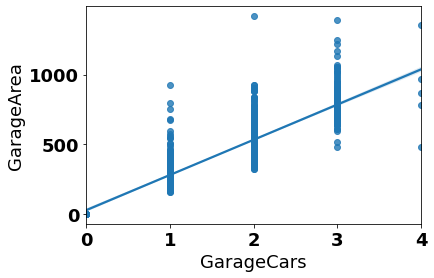

In [45]:
sns.regplot(x='GarageCars', y='GarageArea', data=df_copy)
plt.show()

Os atributos <i>GarageCars</i> e <i>GarageArea</i> apresentam uma correlação forte e ambas possuem correlação similar com o atributo alvo então ao remover uma delas não haverá perda na qualidade do modelo. O atributo a ser retirado será o <i>GarageArea</i> por apresentar uma menor correlação com o atributo alvo.

In [46]:
train_baseline(df_copy.drop('GarageArea', axis=1))

A média da métrica MAE foi de 21457.65
A média da métrica RMSE foi de 34430.21
A média da métrica R2 foi de 0.797


Os resultados do modelo confirmam que a falta do atributo <i>GarageArea</i> não foi impactante e a suposição de que <i>GarageCars</i> a substitui foi provada. 

In [47]:
# Removendo as variáveis
df_copy = df_copy.drop('GarageArea', axis=1)

In [48]:
df_copy.corr()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.411876,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.547766,0.600671,0.238923,0.308819,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.315707,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.825667,0.537850,0.224880,0.188686,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.179618,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.642277,0.420622,0.205726,0.226298,0.507101
MasVnrArea,0.411876,0.315707,0.179618,1.000000,0.363936,0.344501,0.174561,0.390857,0.085310,0.276833,0.201444,0.102821,0.280682,0.249070,0.252691,0.364204,0.159718,0.125703,0.477493
TotalBsmtSF,0.537808,0.391452,0.291066,0.363936,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,0.285573,0.339519,0.322445,0.434585,0.232019,0.247264,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.344501,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.409516,0.410531,0.233449,0.439317,0.235459,0.211671,0.605852
2ndFlrSF,0.295493,0.010308,0.140024,0.174561,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.616423,0.194561,0.070832,0.183926,0.092165,0.208026,0.319334
GrLivArea,0.593007,0.199010,0.287389,0.390857,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.825489,0.461679,0.231197,0.467247,0.247433,0.330224,0.708624
BsmtFullBath,0.111098,0.187599,0.119470,0.085310,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.030905,-0.150673,-0.053275,0.137928,0.124553,0.131881,0.175315,0.067341,0.227122
FullBath,0.550600,0.468271,0.439046,0.276833,0.323722,0.380637,0.421378,0.630012,-0.064512,1.000000,0.136381,0.363252,0.554784,0.243671,0.484557,0.469672,0.187703,0.259977,0.560664


In [49]:
df[['YearBuilt','YearRemodAdd','SalePrice']].head()

,YearBuilt,YearRemodAdd,SalePrice
Id,,,
1,2003,2003,208500
2,1976,1976,181500
3,2001,2002,223500
4,1915,1970,140000
5,2000,2000,250000


In [50]:
df[['YearBuilt','YearRemodAdd','SalePrice']].corr()

,YearBuilt,YearRemodAdd,SalePrice
YearBuilt,1.000000,0.592855,0.522897
YearRemodAdd,0.592855,1.000000,0.507101
SalePrice,0.522897,0.507101,1.000000


O atributo <i>YearRemodAdd</i> indica o ano que a casa da remodelada, no entanto, caso a casa não tenha sido alterada, ele possui o mesmo valor que o atributo <i>YearBuilt</i>.

In [51]:
print('Há {} que foram remodeladas, representando {}% do total de exemplos.'.format(len(df[df['YearBuilt'] != df['YearRemodAdd']]),
                                                                                  round(len(df[df['YearBuilt'] != df['YearRemodAdd']]) / len(df_copy) * 100), 2))


Há 696 que foram remodeladas, representando 48% do total de exemplos.


O número de casas remodeladas é expressivo, representando quase metade do exemplos na base de dados, portanto não será removido da base de dados final.

In [52]:
train_baseline(df_copy)

A média da métrica MAE foi de 21457.65
A média da métrica RMSE foi de 34430.21
A média da métrica R2 foi de 0.797


In [53]:
df_copy.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,HouseStyle,OverallQual,YearBuilt,...,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,2Story,7,2003,...,2003.0,RFn,2,TA,Y,0,61,WD,Normal,208500
2,20,RL,Reg,Lvl,FR2,Gtl,Veenker,1Story,6,1976,...,1976.0,RFn,2,TA,Y,298,0,WD,Normal,181500
3,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,2Story,7,2001,...,2001.0,RFn,2,TA,Y,0,42,WD,Normal,223500
4,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,2Story,7,1915,...,1998.0,Unf,3,TA,Y,0,35,WD,Abnorml,140000
5,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,2Story,8,2000,...,2000.0,RFn,3,TA,Y,192,84,WD,Normal,250000


Após a limpeza da variáveis numéricas o modelo apresentou resultados similares ao obtidos anteriormente, logo novamente não houve perda ou ganho de informação, porém a qualidade da base de dados e do modelo foi melhorada.

In [54]:
df_copy.to_csv('dataset/train_clean_with_nan.csv')